# Signal and Image Proccesing : Assignment 1

# 1


In [68]:
import matplotlib.pyplot as plt
import skimage.io as ski
from skimage.io import imread
from pylab import ginput
import numpy as np
import numpy.random as npr
from skimage import img_as_ubyte
from skimage import img_as_uint
from skimage.color import rgb2hsv
from skimage.transform import resize
from skimage.color import rgba2rgb
import time

# 1.1

# 1.2

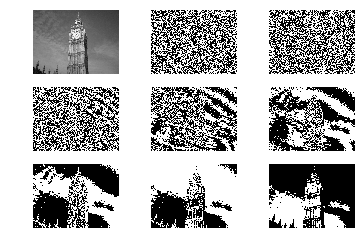

In [69]:
def bit_slicing(path):
  plt.figure()
  plt.subplot(3,3,1)
  I = img_as_ubyte(imread(path, as_gray = True))
  plt.imshow(I, cmap = 'gray')
  plt.axis('off')

  for b in range(0, 8):
    plt.subplot(3,3,b+2)
    J = np.bitwise_and(I, 2**b)
    plt.imshow(J, cmap = 'gray')
    plt.axis('off')
bit_slicing('Images/bigben.png')

# 1.3


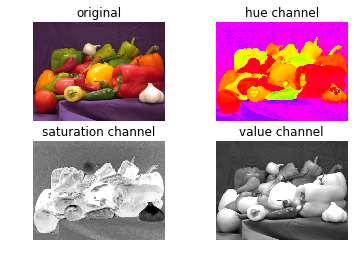

In [70]:
def HSV(path):

  plt.figure()
  I = imread(path)
  if len(I.shape) != 3:
    print('ERROR: image not in RGB')
    exit
  plt.subplot(2,2,1)
  plt.imshow(I)
  plt.axis('off')
  plt.title('original')
  I_hsv = rgb2hsv(I)
  plt.subplot(2,2,2)
  plt.imshow(I_hsv[:, :, 0], cmap = 'hsv')
  plt.axis('off')
  plt.title('hue channel')
  plt.subplot(2,2,3)
  plt.imshow(I_hsv[:, :, 1], cmap = 'gray')
  plt.axis('off')
  plt.title('saturation channel')
  plt.subplot(2,2,4)
  plt.imshow(I_hsv[:, :, 2], cmap = 'gray')
  plt.axis('off')
  plt.title('value channel')
  plt.show()

HSV("Images/peppers.png")

# 1.4

# 1.5

# 1.6

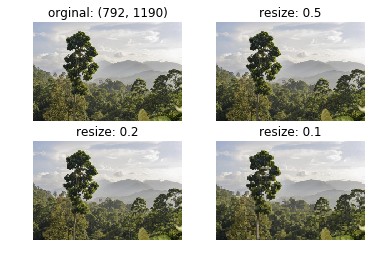

In [71]:
def resize_exp(path):

  I = imread(path)
  I = rgba2rgb(I)
  height = I.shape[0]
  length = I.shape[1]
  plt.subplot(2, 2, 1)
  plt.imshow(I)
  plt.axis('off')
  plt.title('orginal: (%i, %i)' %(height, length))

  I1 = resize(I, (np.floor(0.5*height), np.floor(0.5*length), 3))
  plt.subplot(2, 2, 2)
  plt.imshow(I1)
  plt.axis('off')
  plt.title('resize: 0.5')
  I2 = resize(I, (np.floor(0.2*height), np.floor(0.2*length), 3))
  plt.subplot(2, 2, 3)
  plt.imshow(I2)
  plt.axis('off')
  plt.title('resize: 0.2')
  I3 = resize(I, (np.floor(0.1*height), np.floor(0.1*length), 3))
  plt.subplot(2, 2, 4)
  plt.imshow(I3)
  plt.axis('off')
  plt.title('resize: 0.1')

resize_exp('Images/tree.png')

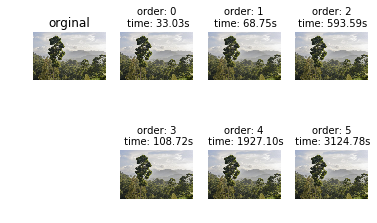

In [72]:
def enlarge(img):

  height = img.shape[0]
  length = img.shape[1]
  factor = 5

  plt.subplot(2, 4, 1)#, sharex=True, sharey=True)
  plt.imshow(img)
  plt.axis('off')
  plt.title('orginal', fontsize = 12)

  location = [2, 3, 4, 6, 7, 8]
  for inter in range(6):
    time1 = time.time()*1000
    I1 = resize(img, (height*factor, length*factor, 3), order = inter)
    time2 = time.time()*1000
    diff = time2 - time1
    plt.subplot(2, 4, location[inter])
    plt.imshow(I1)
    plt.axis('off')
    plt.title('order: %i\n time: %.2fs' %(inter, diff), fontsize = 10)
    
I = imread('Images/tree.png')
I = rgba2rgb(I)
img = resize(I, (np.floor(0.2*I.shape[0]), np.floor(0.2*I.shape[1]), 3))
enlarge(img)

# 1.7

length of the steppers in pixel: 179 frontground, 4 background
	the stepper in the frontground is 44.75 times closer to the camera than the stepper in the background
If we assume the standard length of a railway sleeper to be 2.5 m, what additional information would be needed to determine the absolute distance of these items from the camera?
	additional information: focal length, pixel size?
How could this be applied to other areas, such as estimating the distance of people or cars from the camera?
	distance = size_real/size_in_image * focal length


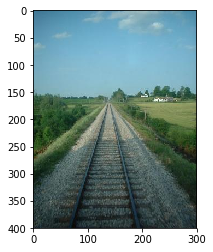

In [80]:
path = 'Images/railway.png'
I = imread(path)
plt.imshow(I)
#manually measured:
ycoords_front = [37, 215]
length_front = ycoords_front[1] - ycoords_front[0] +1
ycoords_rear = [137, 140]
length_rear = ycoords_rear[1] - ycoords_rear[0] +1
print('length of the steppers in pixel: %i frontground, %i background' %(length_front, length_rear))
#what can we determine about the relative distance to the camera of the two sleepers you have measured?
z_front = 1/length_front
z_rear = 1/length_rear
abs_dist = length_front/length_rear
print('\tthe stepper in the frontground is %.2f times closer to the camera than the stepper in the background' %abs_dist)
print('If we assume the standard length of a railway sleeper to be 2.5 m, what additional ' + 
      'information would be needed to determine the absolute distance of these items from the camera?')
print('\tadditional information: focal length, pixel size?')
print('How could this be applied to other areas, such as estimating the distance of people or cars from the camera?')
print('\tdistance = size_real/size_in_image * focal length')

# 1.8

# 1.9

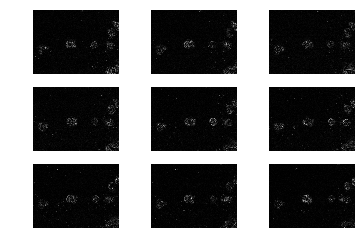

In [73]:
arr_path = ["Images/AT3_1m4_0" + str(i) + ".tif" for i in range(1, 10)]
arr_path += ['Images/AT3_1m4_10.tif']
def motion(arr_path):
  plt.figure()
  number = len(arr_path)
  for i in range(number-1):
    img1 = imread(arr_path[i])
    img2 = imread(arr_path[i+1])
    img = img_as_uint(np.abs(img1.astype('int16') - img2))
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
  plt.show()

motion(arr_path)